In [29]:
#Method 1 for DR PCA
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [30]:
'reading data'

df = pd.read_excel(r"./../Data/RawData.xlsx")

In [31]:
'scaling data'

PCAscaled = StandardScaler().fit(df)

PCAdata_scaled = PCAscaled.transform(df)

PCAscaled_array = np.array(PCAdata_scaled)

print(PCAscaled_array)


[[-1.73118283  0.08664536 -0.50970249 ... -0.10066195  0.21032273
   0.        ]
 [-1.72944644  0.08484114 -0.3665744  ... -0.28157158 -0.37472402
   0.        ]
 [-1.72771005  0.08177297  1.01491127 ... -0.25491056 -0.84601891
   0.        ]
 ...
 [ 1.72771005 -2.27822554  4.42876952 ... -7.21537558  6.11931653
   0.        ]
 [ 1.72944644 -2.28305604  5.94482899 ... -7.48439682  6.1003848
   0.        ]
 [ 1.73118283 -2.27776132  3.94805948 ... -7.66535196  5.44054313
   0.        ]]


In [32]:
'doing train test split'

x_trainvalidation, x_test = train_test_split(PCAscaled_array, test_size=0.2, random_state=4)
x_train, x_validation = train_test_split(x_trainvalidation, test_size=0.2, random_state=42)


In [33]:
'doing PCA'
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_train)

Text(0.5, 1.0, 'DR of the training set by PCA')

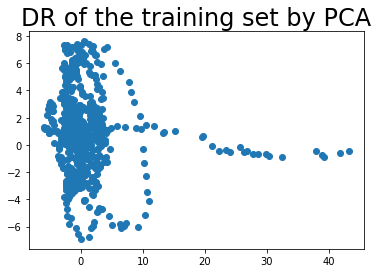

In [34]:
plt.scatter(pca_result[:, 0], pca_result[:, 1])

plt.title('DR of the training set by PCA', fontsize=24)



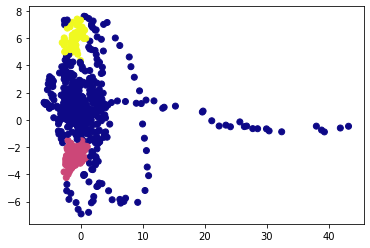

In [35]:
#Clustering PCA using Optics
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import DBSCAN
import numpy as np


mycluster = OPTICS(min_samples = 45).fit(pca_result)
mycluster.labels_

plt.scatter(pca_result[:, 0], pca_result[:, 1], c = mycluster.labels_, cmap = "plasma")

